In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [41]:
data=pd.read_csv('C:\\Users\\sidra fathima\\Downloads\\cs_students.csv')

In [42]:
data.head()

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         180 non-null    int64  
 1   Name               180 non-null    object 
 2   Gender             180 non-null    object 
 3   Age                180 non-null    int64  
 4   GPA                180 non-null    float64
 5   Major              180 non-null    object 
 6   Interested Domain  180 non-null    object 
 7   Projects           180 non-null    object 
 8   Future Career      180 non-null    object 
 9   Python             180 non-null    object 
 10  SQL                180 non-null    object 
 11  Java               180 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.0+ KB


In [44]:
data.shape

(180, 12)

In [45]:
data.drop(['Student ID','Name','Major'],axis = 1,inplace=True)
langs = ['Python','SQL','Java']
mapping = {'Weak':0,'Average':1,'Strong':2}
data[langs] = data[langs].replace(mapping)
data[langs] = data[langs].infer_objects(copy=False)
data.head()

,Gender,Age,GPA,Interested Domain,Projects,Future Career,Python,SQL,Java
0,Male,21,3.5,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,2,2,0
1,Female,20,3.2,Data Science,Data Analytics,Data Scientist,1,2,0
2,Male,22,3.8,Software Development,E-commerce Website,Software Engineer,2,2,1
3,Female,21,3.7,Web Development,Full-Stack Web App,Web Developer,0,2,2
4,Male,23,3.4,Cybersecurity,Network Security,Information Security Analyst,1,0,2


In [46]:
data['Future Career'].value_counts()

Future Career
Web Developer                   19
Mobile App Developer            17
Information Security Analyst    17
Cloud Solutions Architect       16
Database Administrator          16
Software Engineer               14
Machine Learning Engineer       13
NLP Research Scientist          11
Graphics Programmer              9
Data Scientist                   8
Data Analyst                     6
AI Researcher                    6
Game Developer                   4
UX Designer                      2
Quantum Computing Researcher     2
Bioinformatician                 2
Healthcare IT Specialist         2
Machine Learning Researcher      1
Robotics Engineer                1
Embedded Software Engineer       1
Security Analyst                 1
Ethical Hacker                   1
IoT Developer                    1
Computer Vision Engineer         1
DevOps Engineer                  1
NLP Engineer                     1
VR Developer                     1
SEO Specialist                   1
Blockc

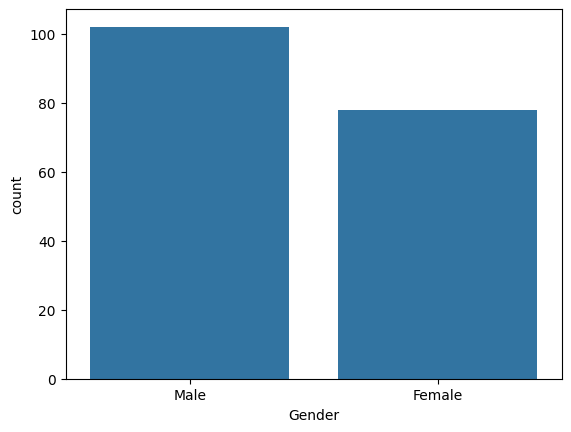

In [47]:
sns.countplot(x= data['Gender'])
plt.show()

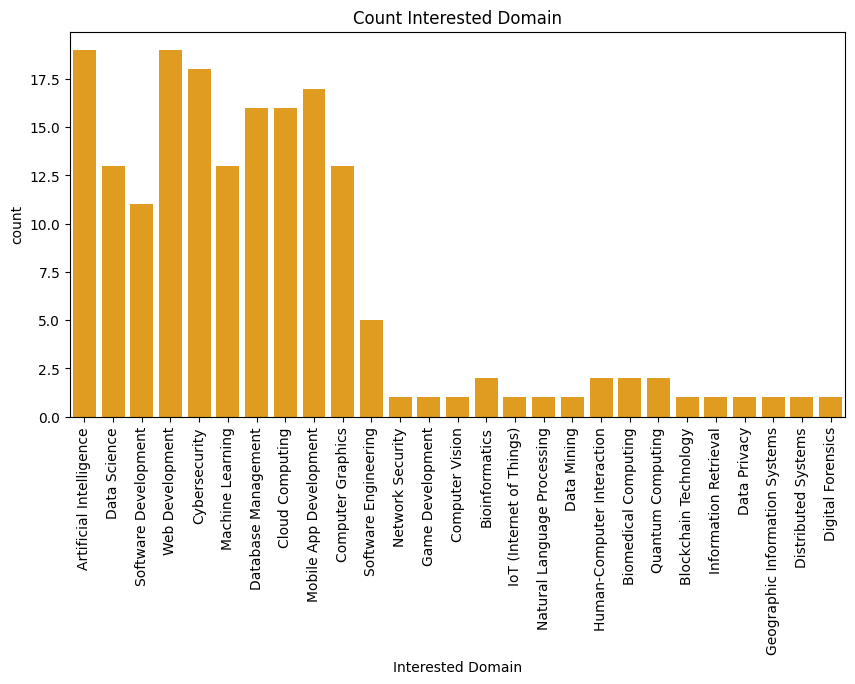

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x ='Interested Domain',color = 'orange')
plt.title('Count Interested Domain')
plt.xlabel('Interested Domain')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Future Career'] = le.fit_transform(data['Future Career'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Interested Domain'] = le.fit_transform(data['Interested Domain'])
data['Projects'] = le.fit_transform(data['Projects'])
data.head()

,Gender,Age,GPA,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,21,3.5,0,8,21,2,2,0
1,0,20,3.2,10,15,7,1,2,0
2,1,22,3.8,24,21,29,2,2,1
3,0,21,3.7,26,26,32,0,2,2
4,1,23,3.4,7,40,18,1,0,2


In [50]:
x = data.drop('Future Career',axis = 1)
y = data['Future Career']

In [51]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)
x_resampled,y_resampled = ros.fit_resample(x,y)

In [52]:
print('resampled class distribution:')
print(pd.Series(y_resampled).value_counts())

resampled class distribution:
Future Career
21    19
7     19
29    19
32    19
18    19
20    19
8     19
3     19
22    19
16    19
24    19
14    19
28    19
12    19
5     19
26    19
13    19
4     19
9     19
1     19
19    19
23    19
30    19
17    19
25    19
31    19
2     19
27    19
6     19
15    19
11    19
10    19
0     19
Name: count, dtype: int64


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size = 0.2,random_state = 42)

In [54]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,random_state=42,min_samples_leaf=10,min_samples_split=5,max_leaf_nodes=5)
RF.fit(x_train,y_train)

RandomForestClassifier(max_leaf_nodes=5, min_samples_leaf=10,
                       min_samples_split=5, random_state=42)

In [55]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(ccp_alpha = 0.01,random_state = 42)
DT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty ='l2',C=0.1,max_iter=1000,solver='saga')
LR.fit(x_train,y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='saga')

In [57]:
pred_RF = RF.predict(x_test)
RF.score(x_test,y_test)

0.8650793650793651

In [58]:
y_pred = DT.predict(x_test)
DT.score(x_test,y_test)

0.9682539682539683

In [59]:
pred_LR = LR.predict(x_test)
LR.score(x_test,y_test)

0.8253968253968254

In [60]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,RF.predict(x_train))
print(train_accuracy)

0.8842315369261478


In [61]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,DT.predict(x_train))
print(train_accuracy)

0.9820359281437125


In [62]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,LR.predict(x_train))
print(train_accuracy)

0.8762475049900199


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4
           5       0.80      0.80      0.80         5
           6       1.00      1.00      1.00         3
           7       1.00      0.80      0.89         5
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         3
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         5
          17       1.00    

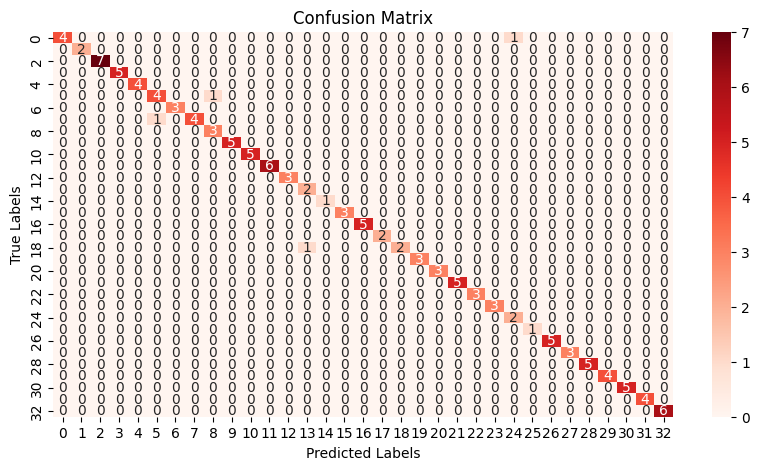

In [64]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()